<a href="https://colab.research.google.com/github/expeditive/machine-learning/blob/main/project/Customer_segmentation_using_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and analysis

In [ ]:
#loading the data to pandas

customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.shape

(200, 5)

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#checking for missingvaues

customer_data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


we are going to group the data based on only 2 features Annual income and Spending Score

In [ ]:
X = customer_data.iloc[:,[3,4]].values   #slicing the dataset by 3 and 4 column

In [ ]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

choosing the numberb of clusters

# **WCSS --> within clusters sum of square**

**WCSS (Within-Cluster Sum of Squares)** is a key concept used in **K-Means clustering** to evaluate how well the algorithm has clustered the data.

---

### 🔹 What is WCSS?

**WCSS** stands for **Within-Cluster Sum of Squares**. It measures the **sum of squared distances** between each point and the **centroid** of its assigned cluster.

It essentially tells you how compact the clusters are — lower WCSS means the points are closer to their centroids (better clustering).

---

### 🔹 Formula:

For **k** clusters:

$$
WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

* $C_i$: Set of points in cluster i
* $\mu_i$: Centroid of cluster i
* $x$: Data point in cluster i

---

### 🔹 Role in Choosing the Optimal Number of Clusters

**Elbow Method**:

* You plot WCSS for a range of k values (e.g., 1 to 10).
* The point where the WCSS starts to decrease more slowly (forming an "elbow" shape) is often the optimal number of clusters.

!\[Would you like me to show you an example elbow plot?]

---

### 🔹 In Python (using Scikit-Learn):

```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
```

---



Here's the **Elbow Plot** based on a synthetic dataset. You can see that the WCSS decreases sharply at first and then levels off. The "elbow" point appears at **k = 4**, which suggests that **4 clusters** may be optimal for this dataset.

Would you like to see the actual cluster visualization for k = 4?

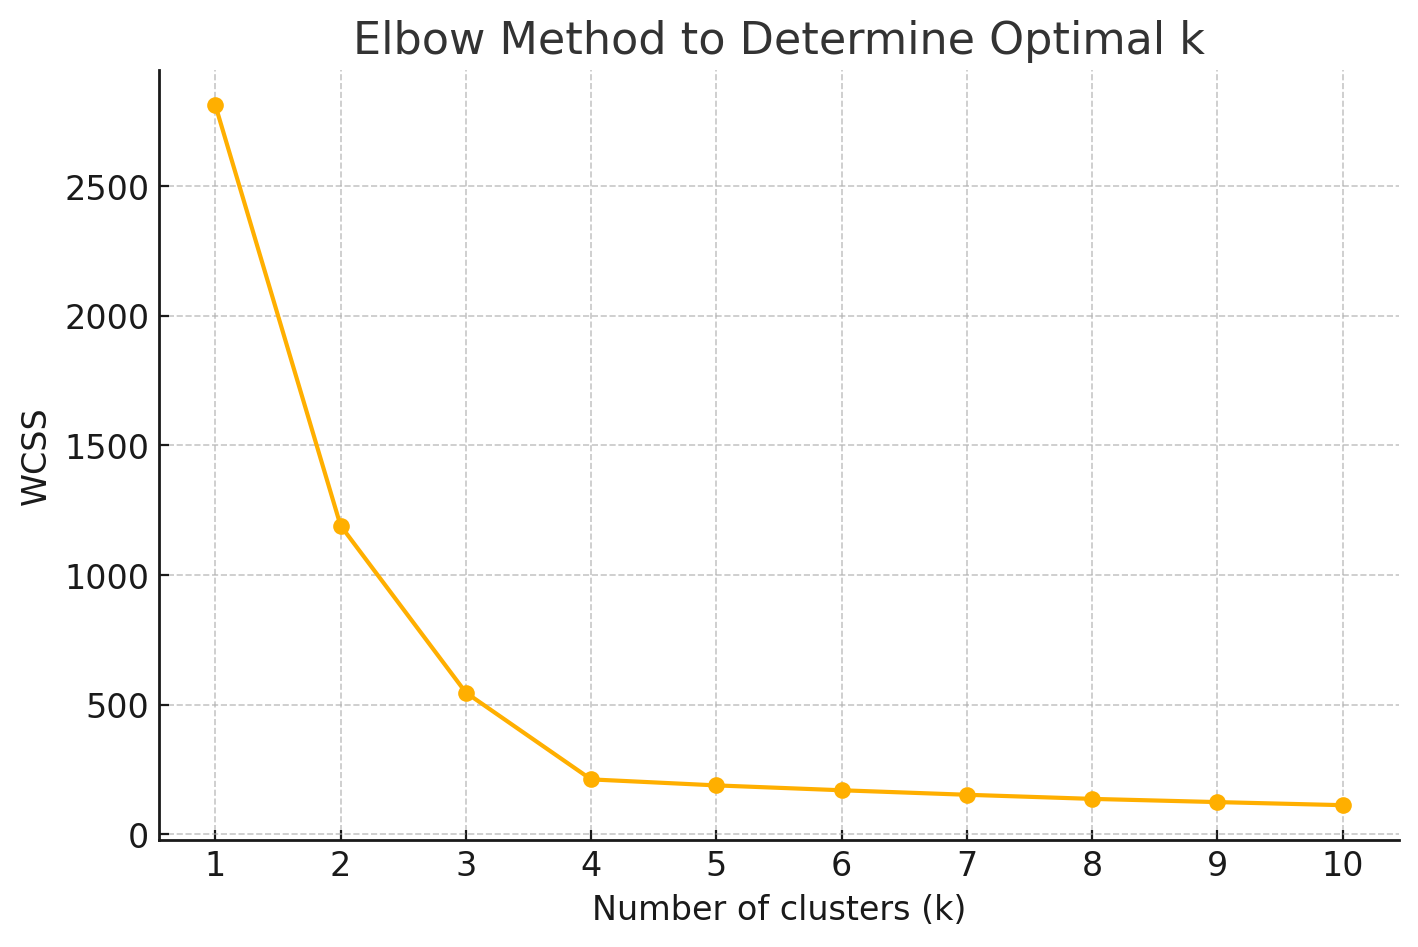

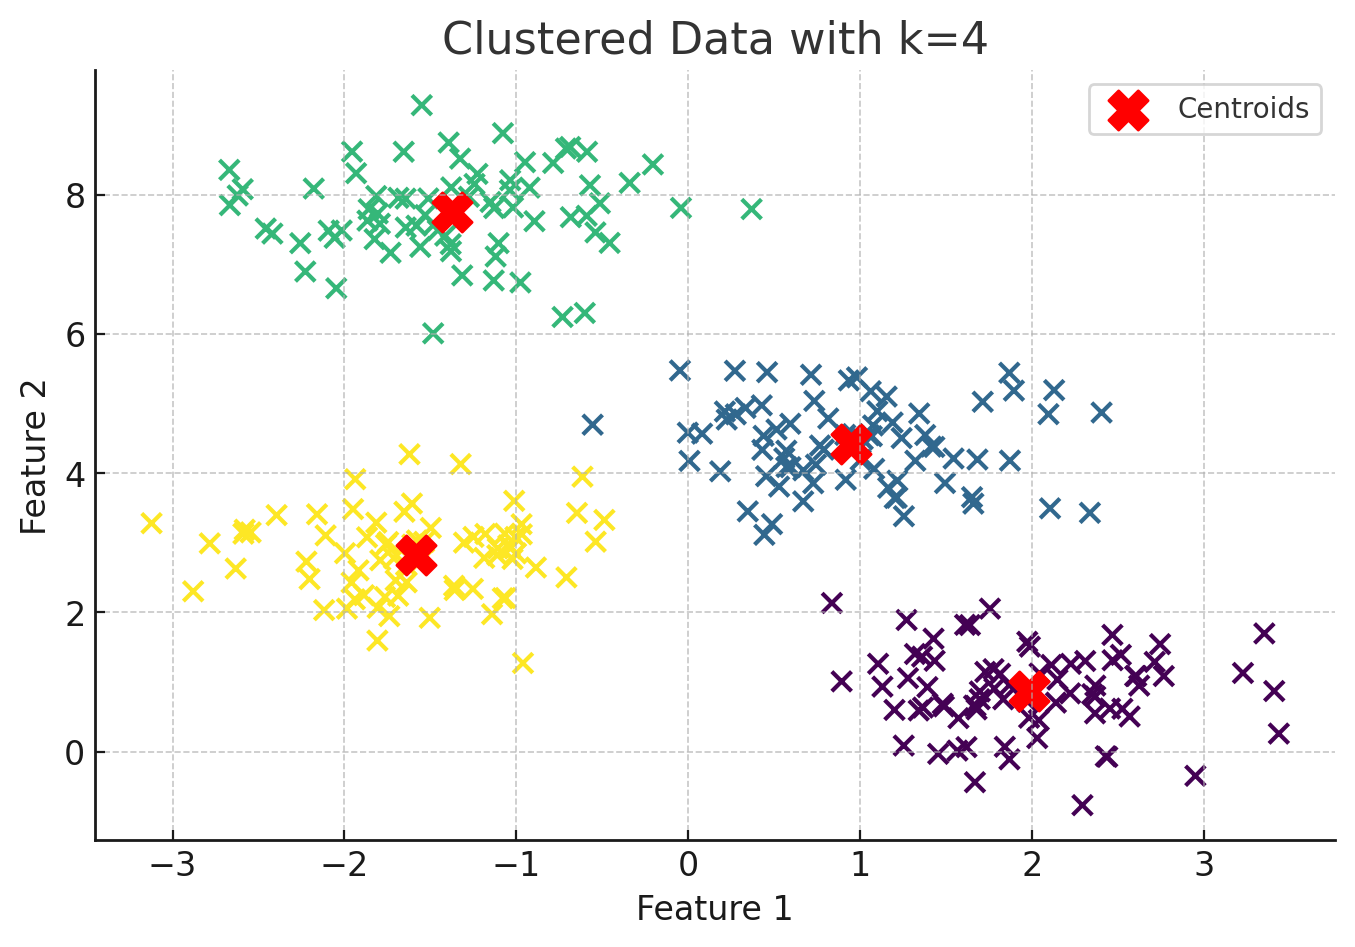

Here’s what you’re seeing:

* The **colored dots** represent the data points, grouped into **4 clusters**.
* The **red X markers** are the **centroids** (centers) of each cluster, calculated by K-Means.
* Each data point is assigned to the **nearest centroid**, minimizing the distance (which contributes to the **WCSS**).

### Summary:

* K-Means tries to group data such that each point is close to the center of its cluster.
* The **Elbow Plot** helps choose the right number of clusters by showing where adding more clusters doesn't significantly reduce WCSS.
* In this case, k = 4 is optimal because the clusters are clearly formed and compact.

Would you like to try this with your own data or understand how the algorithm works step by step?


# **Now finding k in customer data**

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

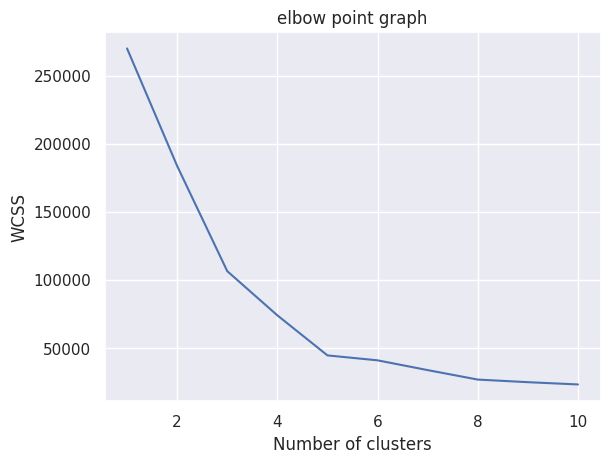

In [ ]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

otimum number of clusters (k=5)

##training the kmeans clustering model

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=0)
#return a label for each data point
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


5 clusters = 0 1 2 3 4

##Visualising all the cluster

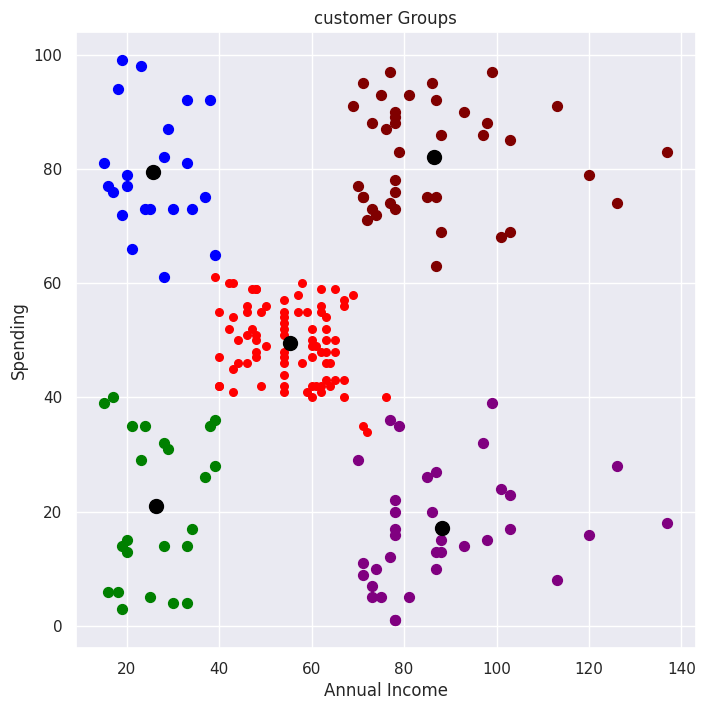

In [ ]:
#plotting all the clusters and thier centroid

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s = 30, c = 'red', label = 'clister 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s = 50, c = 'maroon', label = 'clister 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s = 50, c = 'purple', label = 'clister 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s = 50, c = 'green', label = 'clister 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s = 50, c = 'blue', label = 'clister 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='black', label='centroids')

plt.title('customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending')
plt.show()